---

<center> <h1> <span style='color:#292D78'> Data Science Project</span> </h1> </center>

<center> <h2> <span style='color:#DF7F00'> Project: Student adaptility to online education in Bangladesh </span> </h2> </center>

---

In this [Jupyter Notebook](https://jupyter.org/install) Different *classification models* are used to predict **online eduction adptivity using demographic details**.

# Student adaptibity prediction



## Data Loading

Import import libraries.

In [1]:
# Suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Core
import pandas as pd
import numpy as np
import os

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier, plot_importance
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, accuracy_score,balanced_accuracy_score,recall_score, precision_score, precision_recall_curve, auc,roc_curve,roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from skopt import BayesSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from imblearn.over_sampling import SMOTE

Let's check a few files:

In [6]:
df = pd.read_csv("students_adaptability_level_online_education.csv")
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


# Exploratory Data Analysis

Let's do some plots and see if we can get some insights.

## Univariate Analysis

In [7]:
cols_cat = list(df.select_dtypes(include = ["object"]))


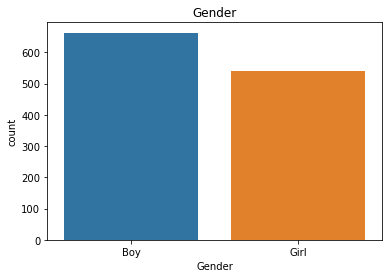

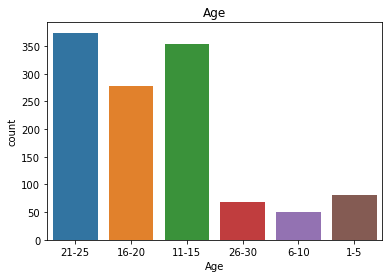

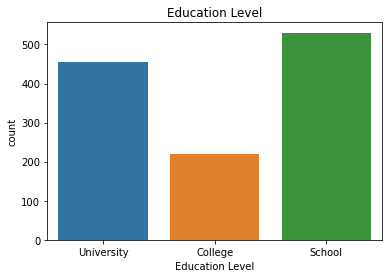

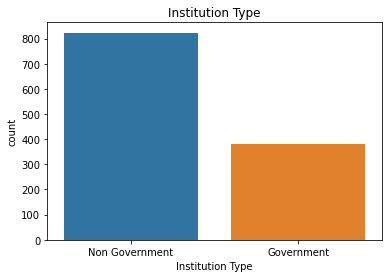

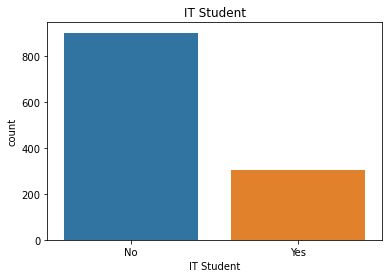

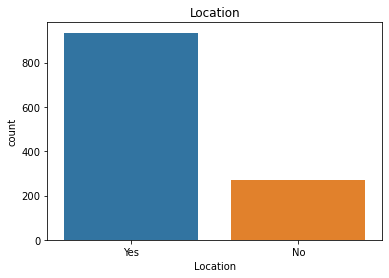

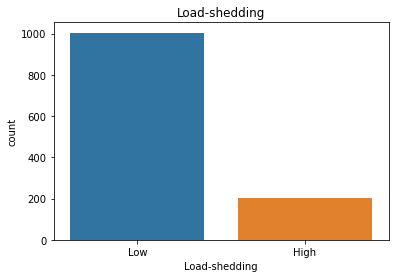

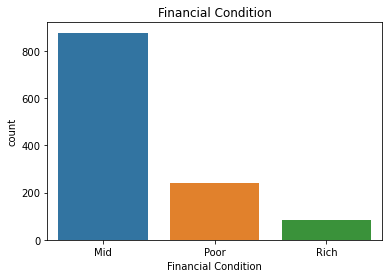

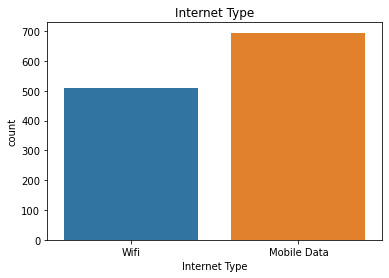

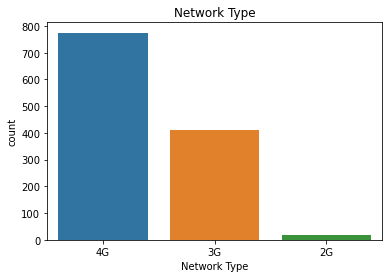

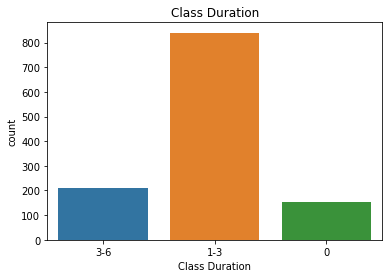

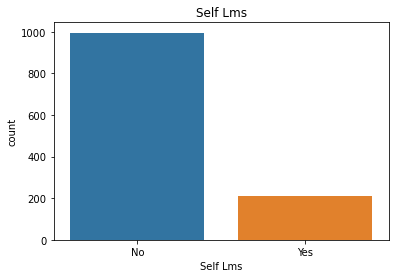

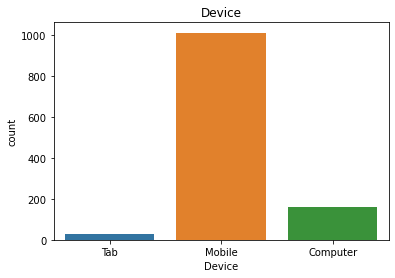

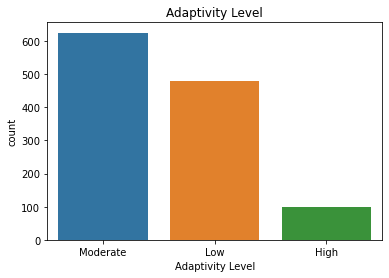

In [8]:
for i in cols_cat:
    sns.countplot(data = df, x = i)
    plt.title(i)
    plt.show()

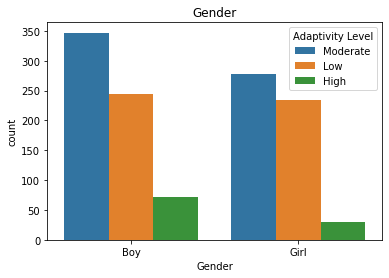

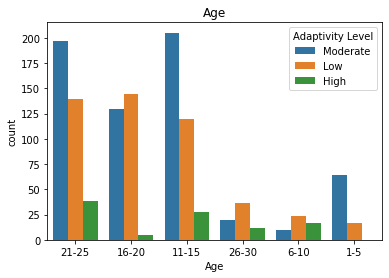

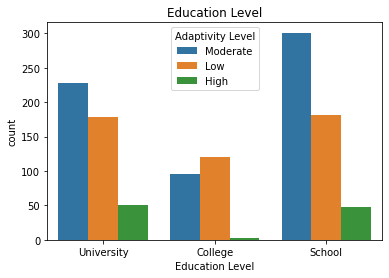

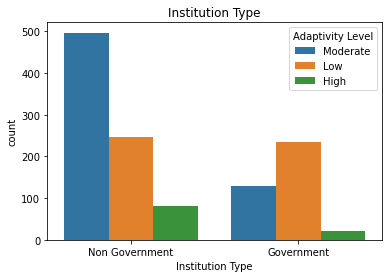

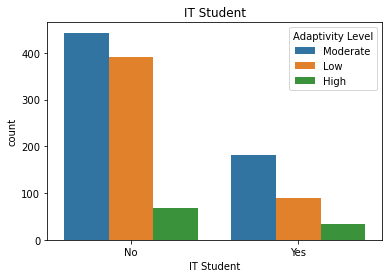

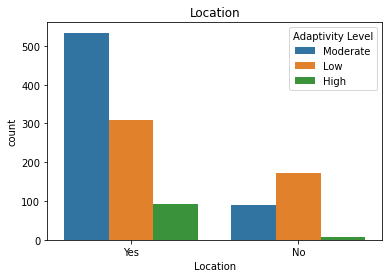

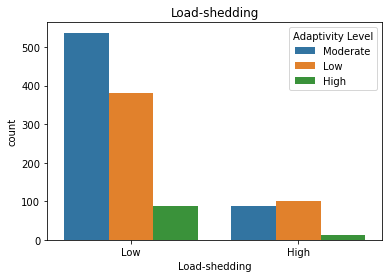

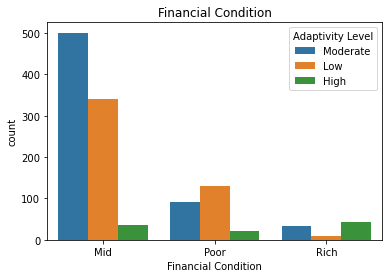

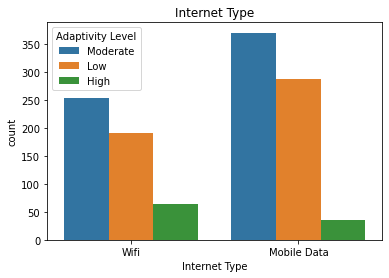

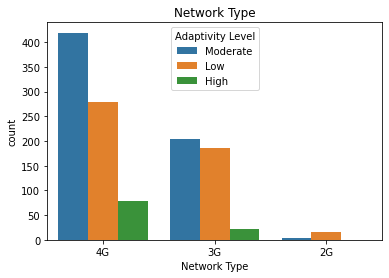

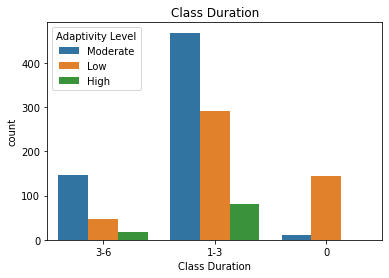

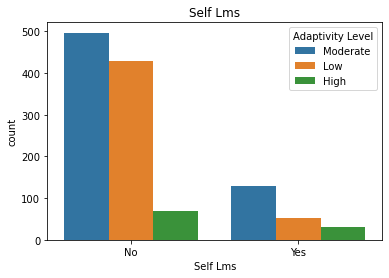

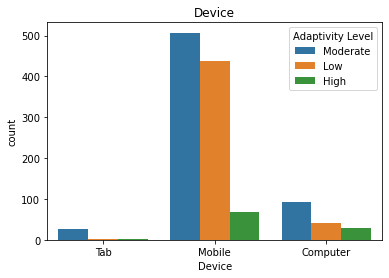

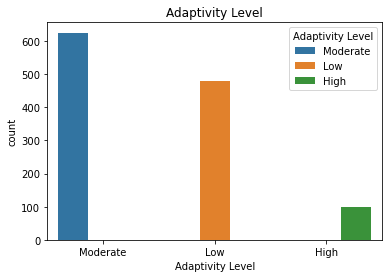

In [9]:
for i in cols_cat:
    sns.countplot(data = df, x = i, hue = "Adaptivity Level" )
    plt.title(i)
    plt.show()

## Data Preparation

Let's check the data types and if there are missing values or duplicated rows.

In [189]:
#df.nunique()

In [188]:
#df.isna().sum()

To map the object or string categories to numerical categories, we can convert then from object to categorical and then extract their numerical code.
pd.Categorical(df["Adaptivity Level"], categories = df["Adaptivity Level"].unique()).codes


In [12]:
for col in df:
    #df["Adaptivity Level"] = pd.Categorical(df["Adaptivity Level"]).codes
    df[col] = df[col].astype("category")
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               1205 non-null   category
 1   Age                  1205 non-null   category
 2   Education Level      1205 non-null   category
 3   Institution Type     1205 non-null   category
 4   IT Student           1205 non-null   category
 5   Location             1205 non-null   category
 6   Load-shedding        1205 non-null   category
 7   Financial Condition  1205 non-null   category
 8   Internet Type        1205 non-null   category
 9   Network Type         1205 non-null   category
 10  Class Duration       1205 non-null   category
 11  Self Lms             1205 non-null   category
 12  Device               1205 non-null   category
 13  Adaptivity Level     1205 non-null   category
dtypes: category(14)
memory usage: 18.4 KB


All columns are categorical.

Values counts:

In [13]:
for col in df.columns:
    print("Unique values of", col, "are :")
    print(df[col].value_counts())
    print("-" * 50)

Unique values of Gender are :
Boy     663
Girl    542
Name: Gender, dtype: int64
--------------------------------------------------
Unique values of Age are :
21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: Age, dtype: int64
--------------------------------------------------
Unique values of Education Level are :
School        530
University    456
College       219
Name: Education Level, dtype: int64
--------------------------------------------------
Unique values of Institution Type are :
Non Government    823
Government        382
Name: Institution Type, dtype: int64
--------------------------------------------------
Unique values of IT Student are :
No     901
Yes    304
Name: IT Student, dtype: int64
--------------------------------------------------
Unique values of Location are :
Yes    935
No     270
Name: Location, dtype: int64
--------------------------------------------------
Unique values of Load-shedding are :
Low     1004
High     201
N

## Multivariate Analysis

In [10]:
#plt.figure(figsize = (20,10))
#sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, fmt = '.2f', cmap = "Spectral")
#plt.show()

In [14]:
adaptivity_levels = ["low","medium","High"]
AdaptivityLevel_dict = {'Low':1 ,'Moderate' : 2, 'High': 3}

#target = "Adaptivity Level"

df["Adaptivity_Levels"] = df["Adaptivity Level"].map(AdaptivityLevel_dict)

df[["Adaptivity Level","Adaptivity_Levels"]]


,Adaptivity Level,Adaptivity_Levels
0,Moderate,2
1,Moderate,2
2,Moderate,2
3,Moderate,2
4,Low,1
...,...,...
1200,Low,1
1201,Moderate,2
1202,Moderate,2
1203,Low,1


In [15]:
df2 = df.copy()


In [16]:

# One-hot encoding
data2 = pd.get_dummies(df2.drop(["Adaptivity Level","Adaptivity_Levels"], axis = 1), drop_first = True)

data = pd.concat([data2, df2[["Adaptivity Level","Adaptivity_Levels"]]], axis= 1, join="outer")
data

,Gender_Girl,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_School,Education Level_University,Institution Type_Non Government,IT Student_Yes,...,Internet Type_Wifi,Network Type_3G,Network Type_4G,Class Duration_1-3,Class Duration_3-6,Self Lms_Yes,Device_Mobile,Device_Tab,Adaptivity Level,Adaptivity_Levels
0,0,0,0,1,0,0,0,1,1,0,...,1,0,1,0,1,0,0,1,Moderate,2
1,1,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,1,1,0,Moderate,2
2,1,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,Moderate,2
3,1,1,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,1,0,Moderate,2
4,1,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,0,1,0,0,0,0,0,1,0,...,1,0,1,1,0,0,1,0,Low,1
1201,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,Moderate,2
1202,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,Moderate,2
1203,1,0,1,0,0,0,0,0,1,0,...,1,0,1,1,0,0,1,0,Low,1


In [17]:
features = list(data.drop(["Adaptivity Level", "Adaptivity_Levels"], axis = 1))
target = "Adaptivity_Levels"
print(features)

['Gender_Girl', 'Age_11-15', 'Age_16-20', 'Age_21-25', 'Age_26-30', 'Age_6-10', 'Education Level_School', 'Education Level_University', 'Institution Type_Non Government', 'IT Student_Yes', 'Location_Yes', 'Load-shedding_Low', 'Financial Condition_Poor', 'Financial Condition_Rich', 'Internet Type_Wifi', 'Network Type_3G', 'Network Type_4G', 'Class Duration_1-3', 'Class Duration_3-6', 'Self Lms_Yes', 'Device_Mobile', 'Device_Tab']


## One hotencoding

# Classification

1. Logistic regression:

In [18]:
train, test = train_test_split(data, test_size = 0.3,random_state = 10) #stratify = train[target]
print(data.shape)
print(train.shape)
print(test.shape)
print(train.shape[0] + test.shape[0])

(1205, 24)
(843, 24)
(362, 24)
1205


In [19]:
train[target].unique()

[1, 3, 2]
Categories (3, int64): [1, 3, 2]

Let's set a function that returns the scores in a dataframe:

## Logistic Regression

Let's try a [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from `Scikit-Learn`.

In [20]:
def model_metrics(label, pred):

    # Compute metrics
    acc = accuracy_score(label, pred)
    bacc = balanced_accuracy_score(label, pred) # average of recall obtained on each class.
    recall = recall_score(label, pred, average='macro') # tp / (tp + fn)
    precision = precision_score(label, pred, average='macro') # tp / (tp + fp)
    f1 = f1_score(label, pred, average='macro')
    
    # Metrics to dictionary
    metrics_dict = {"Accuracy": acc,
                    "Balanced Accuracy": bacc,
                    "Recall": recall,
                    "Precision": precision,
                    "F1": f1}

    # creating a dataframe of metrics
    metrics_df = pd.DataFrame(metrics_dict, index = [0])

    return metrics_df
#average='macro'beacuase this is NOT binary classifier

### Default model

**********************************************************************
Train Data
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0   0.67497           0.742259  0.742259   0.626423  0.638336
**********************************************************************
Test metrics
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.660221           0.726108  0.726108   0.613228  0.616475
**********************************************************************


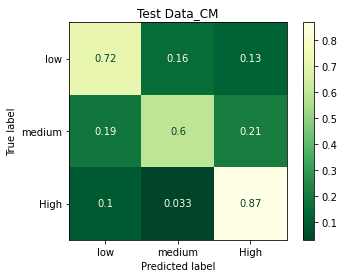

In [21]:
# Training the model
model_lg = LogisticRegression(solver = "newton-cg", class_weight = "balanced", multi_class = "multinomial", random_state = 10).fit(train[features], train[target])

# Computing predictions
pred_train_lg = model_lg.predict(train[features])
pred_test_lg = model_lg.predict(test[features])
pred_prob_lg = model_lg.predict_proba(test[features]) # multi_class is set to be “multinomial” the softmax function 


# Metrics
print(70 * "*")
print("Train Data")
print(model_metrics(train[target], pred_train_lg))
print(70 * "*")
print("Test metrics")
print(model_metrics(test[target], pred_test_lg))
print(70 * "*")

# Confusion matrix:
# Testing Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test_lg, display_labels = adaptivity_levels , cmap = "YlGn_r", normalize ='true');
plt.grid(False)
plt.title("Test Data_CM");



In [22]:
from sklearn import metrics
print(metrics.classification_report(test[target], pred_test_lg, digits=3))

              precision    recall  f1-score   support

           1      0.684     0.717     0.700       127
           2      0.853     0.595     0.701       205
           3      0.302     0.867     0.448        30

    accuracy                          0.660       362
   macro avg      0.613     0.726     0.616       362
weighted avg      0.748     0.660     0.680       362



Computing predictions:

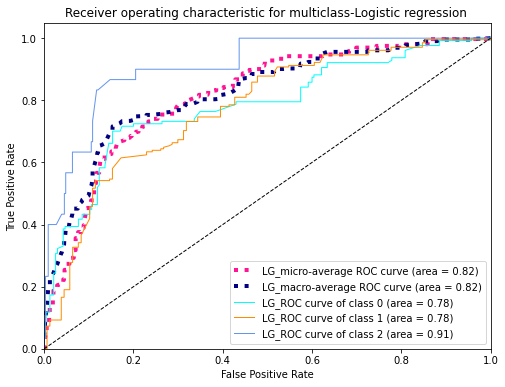

In [24]:
import matplotlib.pyplot as plt
from itertools import cycle

classes=np.unique(test[target])
n_classes = classes.shape[0]    
lw=1

# roc curve for classes
fpr = {} #Fpr = Fp/Fp+Tn
tpr = {} # recall (Tp/Tp+Fn)
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]
from sklearn.preprocessing import label_binarize
y_test_binarized=label_binarize(test[target],classes=np.unique(test[target]))
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob_lg[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro_lg"] = all_fpr
tpr["macro_lg"] = mean_tpr
roc_auc["macro_lg"] = auc(fpr["macro_lg"], tpr["macro_lg"])

# Compute micro-average ROC curve and ROC area

# micro-average ROC curve and ROC area
fpr["micro_lg"], tpr["micro_lg"], _ = roc_curve(y_test_binarized.ravel(), pred_prob_lg.ravel())
roc_auc["micro_lg"] = auc(fpr["micro_lg"], tpr["micro_lg"])



# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(
    fpr["micro_lg"],
    tpr["micro_lg"],
    label="LG_micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro_lg"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro_lg"],
    tpr["macro_lg"],
    label="LG_macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro_lg"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="LG_ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i])
)


plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for multiclass-Logistic regression ")
plt.legend(loc="lower right")
plt.show()




### Tuning the parameters

In [30]:
%%time

model_lr = LogisticRegression(random_state = 10)

# Parameters to test
params = {
    "solver": ["lbfgs","sag","newton-cg"], #, "OvR"
    "max_iter": [100, 200],
    "multi_class" : ["multinomial"], #‘ovr’ binary problem
    "class_weight": ["balanced"],
   
}

# Grid Search
grid_cv = GridSearchCV(model_lr, params, cv = 5, scoring = 'balanced_accuracy', verbose =1).fit(train[features], train[target])

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with balanced_accuracy' of {grid_cv.best_score_}!")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters are {'class_weight': 'balanced', 'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'lbfgs'} with balanced_accuracy' of 0.6518913480885311!
Wall time: 1.25 s


In [155]:
%%time
#for estimator LogisticRegression(random_state=10). Valid parameters are: 
#['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 
#'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start']
# Model
model_lr = LogisticRegression(random_state = 10)

# Parameters to test
params = {
    "solver": ["lbfgs","sag","newton-cg"], #, "OvR"
    "max_iter": [100, 200],
    "multi_class" : ["multinomial"], #‘ovr’ binary problem
    "class_weight": ["balanced"],
   
}

# Grid Search
grid_cv = BayesSearchCV(model_lr, params, cv = 5, scoring = 'balanced_accuracy', random_state =10).fit(train[features], train[target])

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with balanced accuracy of {grid_cv.best_score_}!")

Best parameters are OrderedDict([('class_weight', 'balanced'), ('max_iter', 123), ('multi_class', 'multinomial'), ('solver', 'newton-cg')]) with balanced accuracy of 0.6518913480885311!
Wall time: 1min 14s


### Under-Sampling  by Random Sampler

Let's try under-sampling the data:

In [25]:
rus = RandomUnderSampler(random_state = 10)

# Under-sampling the data
X_under, y_under = rus.fit_resample(train[features], train[target])

print(X_under.shape[0], train.shape[0])
y_under.value_counts()

210 843


3    70
1    70
2    70
Name: Adaptivity_Levels, dtype: int64

**********************************************************************
Training metrics_U:
   Accuracy  Balanced Accuracy   Recall  Precision        F1
0   0.72381            0.72381  0.72381   0.726338  0.724553
**********************************************************************
Test metrics_U:
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.646409           0.656074  0.656074   0.578363  0.593251
**********************************************************************


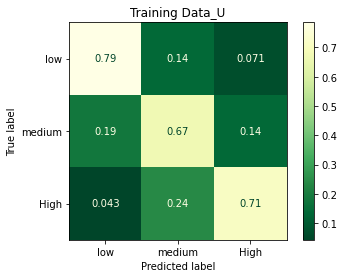

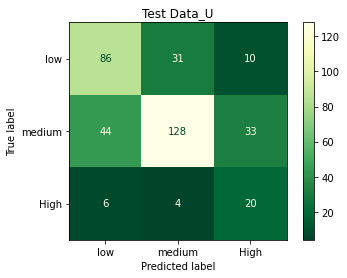

In [27]:
# Training model
model_under = LogisticRegression(random_state = 10).fit(X_under, y_under)

# Computing predictions
pred_train_u = model_under.predict(X_under)
pred_test_u = model_under.predict(test[features])
pred_pro_u = model_under.predict_proba(test[features])

# Metrics
print(70 * "*")
print("Training metrics_U:")
print(model_metrics(y_under, pred_train_u))
print(70 * "*")
print("Test metrics_U:")
print(model_metrics(test[target], pred_test_u))
print(70 * "*")

# Confusion matrix:
# Training Data
ConfusionMatrixDisplay.from_predictions(y_under, pred_train_u, display_labels = adaptivity_levels , cmap = "YlGn_r", normalize = "true")
plt.title("Training Data_U")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test_u, display_labels = adaptivity_levels , cmap = "YlGn_r")
plt.title("Test Data_U");

### Under-Sampling _Imbalance-learn samplers

Let's try other under-sampling the data:

In [39]:
from imblearn.under_sampling import ClusterCentroids

ccu = ClusterCentroids()
X_res, Y_res =ccu.fit_resample(train[features], train[target])

In [40]:
Y_res.value_counts()


3    70
1    70
2    70
Name: Adaptivity_Levels, dtype: int64

**************************************************
Training metrics_U_im:
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.761905           0.761905  0.761905   0.764644  0.761044
**************************************************
Test metrics_U_im:
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.519337           0.646169  0.646169      0.548  0.494475
**************************************************


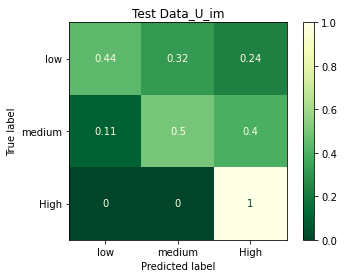

In [42]:
# Training model
model_under_grid = LogisticRegression(
    max_iter = 200, 
    solver = "newton-cg", 
    #random_state = 10
).fit(X_res, Y_res)

# Computing predictions
pred_train_U_im_CC = model_under_grid.predict(X_res)
pred_test_U_im_CC = model_under_grid.predict(test[features])
pred_pro_U_im_CC  = model_under_grid.predict_proba(test[features])
# Metrics
print(50 * "*")
print("Training metrics_U_im:")
print(model_metrics(Y_res, pred_train_U_im_CC))
print(50 * "*")
print("Test metrics_U_im:")
print(model_metrics(test[target], pred_test_U_im_CC))
print(50 * "*")

# Confusion matrix:
# Training Data
#onfusionMatrixDisplay.from_predictions(Y_res, pred_train_U_im, display_labels = adaptivity_levels , cmap = "YlGn_r")
#plt.title("Training Data_U_im")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test_U_im_CC, display_labels = adaptivity_levels , cmap = "YlGn_r", normalize ='true')
plt.title("Test Data_U_im");

### Over-Sampling

Now, let's over-sample the data using SMOTE:

In [47]:
# Creating the over-sampling model
sm = SMOTE(random_state = 10)

# over-sampling the data
X_over, y_over = sm.fit_resample(train[features], train[target])

print(X_over.shape[0], train.shape[0])
y_over.value_counts()


1260 843


3    420
1    420
2    420
Name: Adaptivity_Levels, dtype: int64

In [48]:
# Training model
model_over = LogisticRegression(random_state = 10).fit(X_over, y_over)

# Computing predictions
pred_train_lg_SMOT = model_over.predict(X_over)
pred_test_lg_SMOT = model_over.predict(test[features])
pred_pro_lg_SMOT = model_over.predict_proba(test[features])
# Metrics
print(50 * "*")
print("Training metrics_O:")
print(model_metrics(y_over, pred_pro_lg_SMOT))
print(50 * "*")
print("Test metrics_O:")
print(model_metrics(test[target], pred_pro_lg_SMOT))
print(50 * "*")

# Confusion matrix:
# Training Data
#ConfusionMatrixDisplay.from_predictions(y_over, pred_train_o, display_labels = adaptivity_levels , cmap = "YlGn_r", normalize ='true')
#plt.title("Training Data_O")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_pro_lg_SMOT, display_labels = adaptivity_levels , cmap = "YlGn_r", normalize ='true')
plt.title("Test Data_O");

**************************************************
Training metrics_O:


ValueError: Found input variables with inconsistent numbers of samples: [1260, 362]

--AUC for Low adaptility---> 0.78
--AUC for Moderate adaptility---> 0.78
--AUC for High adaptility---> 0.91


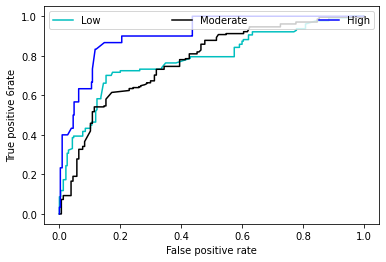

In [162]:
d = test[target].unique()
d
plt.figure(figsize=(6, 4))
plt.ylabel("True positive 6rate") # recall (Tp/Tp+Fn)
plt.xlabel("False positive rate") #Fpr = Fp/Fp+Tn
Fpr,Tpr,thresholds = roc_curve(test[target], pred_pro_o[:,0], pos_label = 1)
plt.plot(Fpr,Tpr,"c-",label='Low')
Fpr,Tpr,thresholds = roc_curve(test[target], pred_pro_o[:,1], pos_label = 2)
plt.plot(Fpr,Tpr,"k-",label='Moderate')
Fpr,Tpr,thresholds = roc_curve(test[target], pred_pro_o[:,2], pos_label = 3)
plt.plot(Fpr,Tpr,"b-",label='High')
plt.legend(loc="upper center", mode = "expand", ncol = 3);


fpr, tpr, thresholdss = roc_curve(test[target], pred_pro_o[:,0], pos_label = 1)
auroc = round(auc(fpr, tpr),2)
print('--AUC for Low adaptility--->',auroc)
fpr, tpr, thresholdss = roc_curve(test[target], pred_pro_o[:,1], pos_label = 2)
auroc = round(auc(fpr, tpr),2)
print('--AUC for Moderate adaptility--->',auroc)
fpr, tpr, thresholdss = roc_curve(test[target], pred_pro_o[:,2], pos_label = 3)
auroc = round(auc(fpr, tpr),2)
print('--AUC for High adaptility--->',auroc)

Confusion Matrix:

## Decision Tree

Let's try a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).
Non linear solution

Decision tree predictions, metrics

**********************************************************************
Train Data
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.926453           0.889462  0.889462    0.91911  0.902698
**********************************************************************
Test metrics
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.881215           0.862186  0.862186   0.829923  0.844276
**********************************************************************


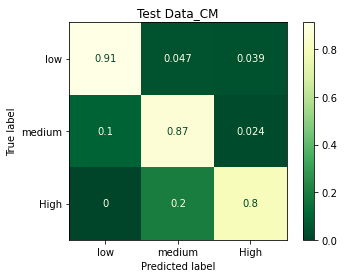

In [50]:
# Set the chosen model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth = 12, random_state = 666).fit(train[features], train[target])

# Computing predictions
dt_pred_train = dt_model.predict(train[features])
dt_pred_test = dt_model.predict(test[features])
pred_pro_dt = dt_model.predict_proba(test[features])

# Metrics
print(70 * "*")
print("Train Data")
print(model_metrics(train[target], dt_pred_train))
print(70 * "*")
print("Test metrics")
print(model_metrics(test[target], dt_pred_test))
print(70 * "*")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], dt_pred_test, display_labels = adaptivity_levels , cmap = "YlGn_r", normalize ='true')
plt.title("Test Data_CM");

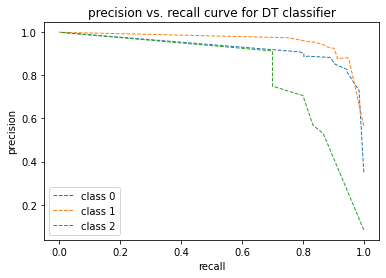

In [51]:
y_test_binarized=label_binarize(test[target],classes=np.unique(test[target]))
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        pred_pro_dt[:, i])
    plt.plot(recall[i], precision[i],linestyle="--", lw=1, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve for DT classifier")
plt.show()

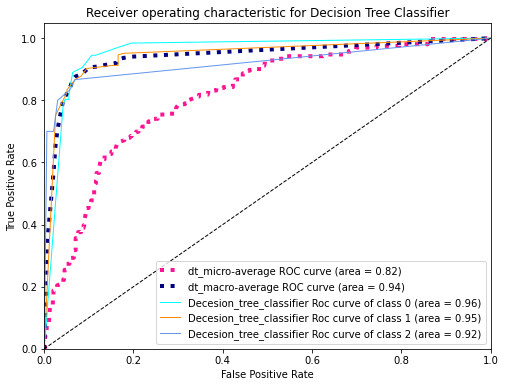

In [52]:
import matplotlib.pyplot as plt
from itertools import cycle

classes=np.unique(test[target])
n_classes = classes.shape[0]    
lw=1

# roc curve for classes
fpr = {} #Fpr = Fp/Fp+Tn
tpr = {} # recall (Tp/Tp+Fn)
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]
from sklearn.preprocessing import label_binarize
y_test_binarized=label_binarize(test[target],classes=np.unique(test[target]))
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_pro_dt[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro_dt"] = all_fpr
tpr["macro_dt"] = mean_tpr
roc_auc["macro_dt"] = auc(fpr["macro_dt"], tpr["macro_dt"])

# Compute micro-average ROC curve and ROC area

# micro-average ROC curve and ROC area
fpr["micro_dt"], tpr["micro_dt"], _ = roc_curve(y_test_binarized.ravel(), pred_prob_lg.ravel())
roc_auc["micro_dt"] = auc(fpr["micro_dt"], tpr["micro_dt"])



# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(
    fpr["micro_dt"],
    tpr["micro_dt"],
    label="dt_micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro_dt"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro_dt"],
    tpr["macro_dt"],
    label="dt_macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro_dt"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="Decesion_tree_classifier Roc curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )


plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for Decision Tree Classifier")
plt.legend(loc="lower right")
plt.show()



### Tuning the parameters

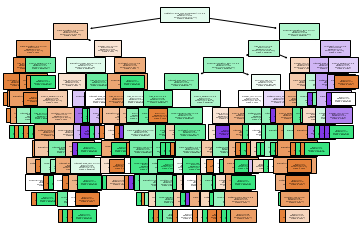

In [111]:
plot_tree(dt_model, feature_names = features, filled = True, class_names = ["Low", "Medium", "High"], fontsize=2);

In [53]:
DT_imp = pd.DataFrame(dt_model.feature_importances_, columns = ["Weights"], index = features)
DT_imp= DT_imp.sort_values("Weights", ascending = False)
DT_imp

,Weights
Gender_Girl,0.090594
Institution Type_Non Government,0.082969
Class Duration_3-6,0.070120
Device_Mobile,0.066885
Location_Yes,0.066321
Self Lms_Yes,0.065955
Internet Type_Wifi,0.063060
Class Duration_1-3,0.053548
Network Type_4G,0.052849
IT Student_Yes,0.049479


In [129]:
%%time

model_DT_Grid= DecisionTreeClassifier(random_state = 10)

# Parameters to test
params = {
    "criterion": ["gini", "entropy", "log_loss"], #, "OvR"
    "max_depth": [6, 8, 10],
   
}

# Grid Search
grid_cv = GridSearchCV(model_DT_Grid, params, cv = 5, scoring = 'balanced_accuracy', verbose =0).fit(train[features], train[target])

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with balanced_accuracy' of {grid_cv.best_score_}!")

Best parameters are {'criterion': 'gini', 'max_depth': 10} with balanced_accuracy' of 0.7640800357701766!
Wall time: 313 ms


### Under-Sampling _Imbalance-learn samplers

Let's try other under-sampling the data:

In [54]:
from imblearn.under_sampling import ClusterCentroids

ccu = ClusterCentroids()
X_res, Y_res =ccu.fit_resample(train[features], train[target])

**************************************************
Training metrics_U_im:
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.952381           0.952381  0.952381   0.952897  0.952005
**************************************************
Test metrics_U_im:
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.665746           0.733852  0.733852   0.612188  0.631467
**************************************************


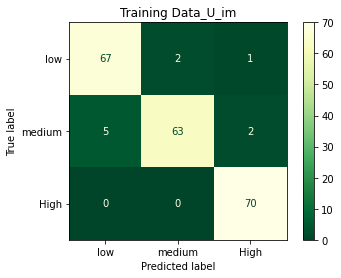

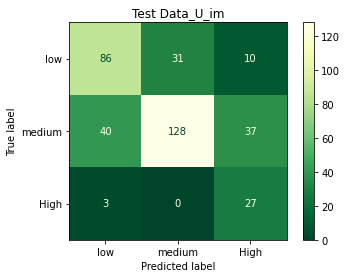

In [55]:
# Training model
model_under_Imb = DecisionTreeClassifier(
    criterion = 'gini', 
    max_depth = 10, 
    random_state = 10
).fit(X_res, Y_res)

# Computing predictions
pred_train_U_im = model_under_Imb.predict(X_res)
pred_test_U_im = model_under_Imb.predict(test[features])
pred_pro_U_im  = model_under_Imb.predict_proba(test[features])
# Metrics
print(50 * "*")
print("Training metrics_U_im:")
print(model_metrics(Y_res, pred_train_U_im))
print(50 * "*")
print("Test metrics_U_im:")
print(model_metrics(test[target], pred_test_U_im))
print(50 * "*")

# Confusion matrix:
# Training Data
ConfusionMatrixDisplay.from_predictions(Y_res, pred_train_U_im, display_labels = adaptivity_levels , cmap = "YlGn_r")
plt.title("Training Data_U_im")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test_U_im, display_labels = adaptivity_levels , cmap = "YlGn_r")
plt.title("Test Data_U_im");

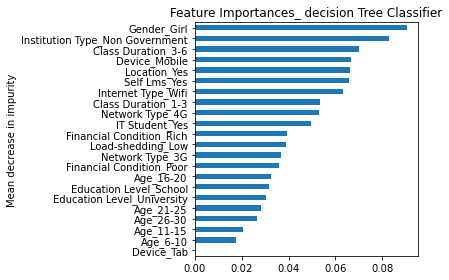

In [56]:
#DT_imp = pd.DataFrame(dt_model.feature_importances_, columns = ["Weights"], index = features)
#DT_imp= DT_imp.sort_values("Weights", ascending = False)
#DT_imp



tree_importances = pd.Series(dt_model.feature_importances_, index = features)

fig, ax = plt.subplots()
tree_importances.sort_values(ascending = True).plot.barh(ax = ax)

ax.set_title("Feature Importances_ decision Tree Classifier")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Random Forest

Let's try a [Random forest multi out classifier](https://scikit-learn.org/stable/modules/multiclass.html).
Non linear solution

**********************************************************************
Training metrics:
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.932384           0.904582  0.904582   0.914136  0.909213
**********************************************************************
Test metrics:
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.895028           0.869317  0.869317   0.853205  0.860905
**********************************************************************


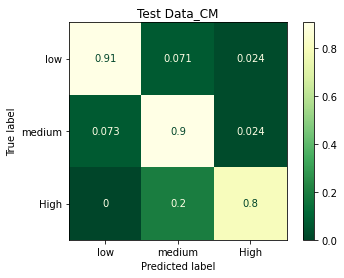

In [57]:
# Training model
model_rf = RandomForestClassifier(criterion='gini', max_depth=12, random_state = 10).fit(train[features], train[target])

# Computing predictions
pred_train_rf = model_rf.predict(train[features])
pred_test_rf = model_rf.predict(test[features])
pred_pro_rf  = model_rf.predict_proba(test[features])
# Metrics
print(70 * "*")
print("Training metrics:")
print(model_metrics(train[target], pred_train_rf))
print(70 * "*")
print("Test metrics:")
print(model_metrics(test[target], pred_test_rf))
print(70 * "*")

# Confusion matrix:
# Training Data
#ConfusionMatrixDisplay.from_predictions(train[target], pred_train_rf)
#plt.title("Training Data")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test_rf, display_labels = adaptivity_levels , cmap = "YlGn_r", normalize = "true")
plt.title("Test Data_CM");

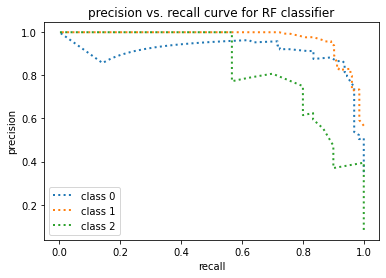

In [58]:
y_test_binarized=label_binarize(test[target],classes=np.unique(test[target]))
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        pred_pro_rf[:, i])
    plt.plot(recall[i], precision[i],linestyle=":", lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve for RF classifier")
plt.show()

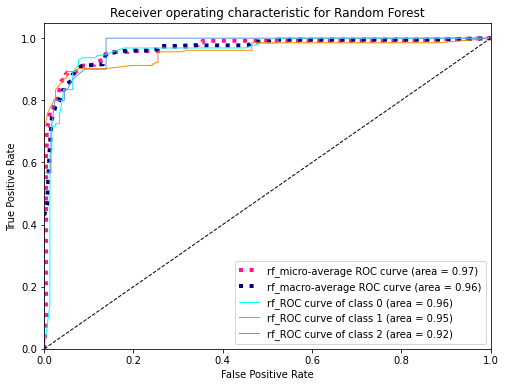

In [59]:
import matplotlib.pyplot as plt
from itertools import cycle

classes=np.unique(test[target])
n_classes = classes.shape[0]    
lw=1
# roc curve for classes
fpr_rf = {} #Fpr = Fp/Fp+Tn
tpr_rf = {} # recall (Tp/Tp+Fn)
thresh_rf ={}
roc_auc_rf = dict()

from sklearn.preprocessing import label_binarize
y_test_binarized_rf=label_binarize(test[target],classes=np.unique(test[target]))
for i in range(n_class):    
    fpr_rf[i], tpr_rf[i], thresh_rf[i] = roc_curve(y_test_binarized_rf[:,i], pred_pro_rf[:,i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# First aggregate all false positive rates
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(n_classes):
    mean_tpr_rf += np.interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])

# Finally average it and compute AUC
mean_tpr_rf /= n_classes

fpr_rf["macro_rf"] = all_fpr_rf
tpr_rf["macro_rf"] = mean_tpr_rf
roc_auc_rf["macro_rf"] = auc(fpr_rf["macro_rf"], tpr_rf["macro_rf"])

# Compute micro-average ROC curve and ROC area

# micro-average ROC curve and ROC area
fpr_rf["micro_rf"], tpr_rf["micro_rf"], _ = roc_curve(y_test_binarized_rf.ravel(), pred_pro_rf.ravel())
roc_auc_rf["micro_rf"] = auc(fpr_rf["micro_rf"], tpr_rf["micro_rf"])


# Plot all ROC curves

plt.figure(figsize=(8,6))
plt.plot(
    fpr_rf["micro_rf"],
    tpr_rf["micro_rf"],
    label="rf_micro-average ROC curve (area = {0:0.2f})".format(roc_auc_rf["micro_rf"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_rf["macro_rf"],
    tpr_rf["macro_rf"],
    label="rf_macro-average ROC curve (area = {0:0.2f})".format(roc_auc_rf["macro_rf"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr_rf[i],
        tpr_rf[i],
        color=color,
        lw=lw,
        label="rf_ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )


plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for Random Forest")
plt.legend(loc="lower right")
plt.show()



In [60]:
RF_imp = pd.DataFrame(model_rf.feature_importances_, columns = ["Weights"], index = features)
RF_imp= RF_imp.sort_values("Weights", ascending = False)
RF_imp


,Weights
Gender_Girl,0.098002
Institution Type_Non Government,0.072815
Internet Type_Wifi,0.066741
Location_Yes,0.066471
Class Duration_1-3,0.065507
Financial Condition_Poor,0.060409
Self Lms_Yes,0.054129
Load-shedding_Low,0.053679
Class Duration_3-6,0.053410
Financial Condition_Rich,0.049118


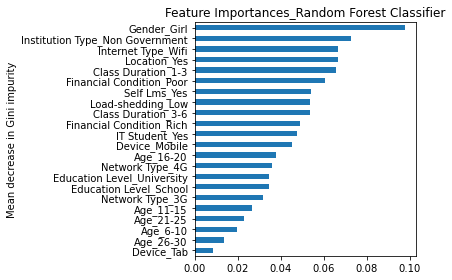

In [61]:
RF_importances = pd.Series(model_rf.feature_importances_, index = features)

fig, ax = plt.subplots()
RF_importances.sort_values(ascending = True).plot.barh(ax = ax)

ax.set_title("Feature Importances_Random Forest Classifier")
ax.set_ylabel("Mean decrease in Gini impurity")
fig.tight_layout()

## Neural Networks

Nos, let's use the [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from `Scikit-Learn`.

**********************************************************************
Training metrics:
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.932384           0.892979  0.892979   0.923806  0.907025
**********************************************************************
Test metrics:
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.875691           0.855938  0.855938   0.795869  0.818446
**********************************************************************


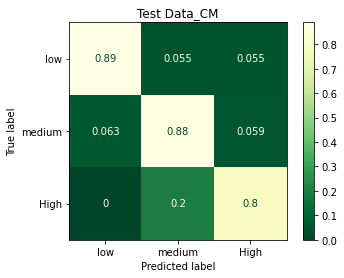

In [62]:
# Training model
model_mlp = MLPClassifier(
    hidden_layer_sizes = (100, 100, 100, 100), 
    solver = "lbfgs",
    max_iter = 500,
    random_state = 666
).fit(train[features], train[target])

# Computing predictions
pred_train_NN_mlp = model_mlp.predict(train[features])
pred_test_NN_mlp  = model_mlp.predict(test[features])
pred_pro_NN_mlp   = model_mlp.predict_proba(test[features])
# Metrics
print(70 * "*")
print("Training metrics:")
print(model_metrics(train[target], pred_train_NN_mlp))
print(70 * "*")
print("Test metrics:")
print(model_metrics(test[target], pred_test_NN_mlp))
print(70 * "*")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test_NN_mlp, display_labels = adaptivity_levels , cmap = "YlGn_r", normalize = "true")
plt.title("Test Data_CM");

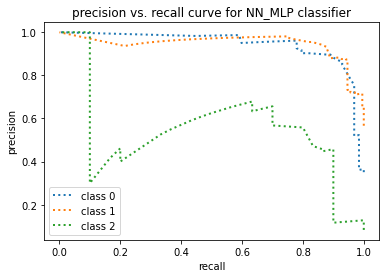

In [63]:
y_test_binarized=label_binarize(test[target],classes=np.unique(test[target]))
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        pred_pro_NN_mlp[:, i])
    plt.plot(recall[i], precision[i],linestyle=":", lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve for NN_MLP classifier")
plt.show()

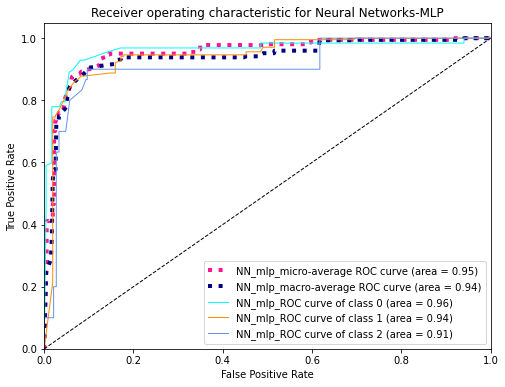

In [64]:
classes=np.unique(test[target])
n_classes = classes.shape[0]    
lw=1
# roc curve for classes
fpr_NN_mlp = {} #Fpr = Fp/Fp+Tn
tpr_NN_mlp = {} # recall (Tp/Tp+Fn)
thresh_NN_mlp ={}
roc_auc_NN_mlp = dict()

from sklearn.preprocessing import label_binarize
y_test_binarized_NN_mlp=label_binarize(test[target],classes=np.unique(test[target]))
for i in range(n_class):    
    fpr_NN_mlp[i], tpr_NN_mlp[i], thresh_NN_mlp[i] = roc_curve(y_test_binarized_NN_mlp[:,i], pred_pro_NN_mlp[:,i])
    roc_auc_NN_mlp[i] = auc(fpr_NN_mlp[i], tpr_NN_mlp[i])

# First aggregate all false positive rates
all_fpr_NN_mlp= np.unique(np.concatenate([fpr_NN_mlp[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_NN_mlp = np.zeros_like(all_fpr_NN_mlp)
for i in range(n_classes):
    mean_tpr_NN_mlp += np.interp(all_fpr_NN_mlp, fpr_NN_mlp[i], tpr_NN_mlp[i])

# Finally average it and compute AUC
mean_tpr_NN_mlp /= n_classes

fpr_NN_mlp["macro_NN_mlp"] = all_fpr_NN_mlp
tpr_NN_mlp["macro_NN_mlp"] = mean_tpr_NN_mlp
roc_auc_NN_mlp["macro_NN_mlp"] = auc(fpr_NN_mlp["macro_NN_mlp"], tpr_NN_mlp["macro_NN_mlp"])

# Compute micro-average ROC curve and ROC area

# micro-average ROC curve and ROC area
fpr_NN_mlp["micro_NN_mlp"], tpr_NN_mlp["micro_NN_mlp"], _ = roc_curve(y_test_binarized_NN_mlp.ravel(), pred_pro_NN_mlp.ravel())
roc_auc_NN_mlp["micro_NN_mlp"] = auc(fpr_NN_mlp["micro_NN_mlp"], tpr_NN_mlp["micro_NN_mlp"])


# Plot all ROC curves

plt.figure(figsize=(8,6))
plt.plot(
    fpr_NN_mlp["micro_NN_mlp"],
    tpr_NN_mlp["micro_NN_mlp"],
    label="NN_mlp_micro-average ROC curve (area = {0:0.2f})".format(roc_auc_NN_mlp["micro_NN_mlp"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_NN_mlp["macro_NN_mlp"],
    tpr_NN_mlp["macro_NN_mlp"],
    label="NN_mlp_macro-average ROC curve (area = {0:0.2f})".format(roc_auc_NN_mlp["macro_NN_mlp"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr_NN_mlp[i],
        tpr_NN_mlp[i],
        color=color,
        lw=lw,
        label="NN_mlp_ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc_NN_mlp[i]),
    )


plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for Neural Networks-MLP")
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting

[XGBClassifier](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) from the `XGBoost` package. For it, we need to map the classes *3*, *20*, and *100* to *0*, *1*, and *2*.

#012 conversionis smportanr for GB not for above 

In [65]:
train["target_xg"]= pd.Categorical(train[target]).codes
train["target_xg"].unique()

array([1, 0, 2], dtype=int8)

In [66]:
test["target_xg"]= pd.Categorical(test[target]).codes
test["target_xg"].unique()

array([2, 1, 0], dtype=int8)

**********************************************************************
Training metrics:
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.921708           0.881114  0.881114   0.915796  0.896778
**********************************************************************
Test metrics:
   Accuracy  Balanced Accuracy    Recall  Precision       F1
0  0.853591           0.827452  0.827452   0.781472  0.79976
**********************************************************************


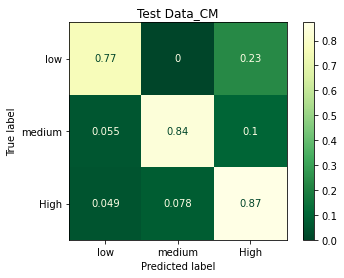

In [67]:
# Training model
model_xgb = XGBClassifier(max_depth = 4, random_state = 666).fit(train[features], train["target_xg"])

# Computing predictions
xgb_pred_train = model_xgb.predict(train[features])
xgb_pred_test = model_xgb.predict(test[features])
pred_prob_XGB = model_lg.predict_proba(test[features])
# Metrics
print(70 * "*")
print("Training metrics:")
print(model_metrics(train["target_xg"], xgb_pred_train))
print(70 * "*")
print("Test metrics:")
print(model_metrics(test["target_xg"], xgb_pred_test))
print(70 * "*")

# Test Data
ConfusionMatrixDisplay.from_predictions(test["target_xg"], xgb_pred_test, cmap = "YlGn_r", display_labels = adaptivity_levels , normalize ="true")
plt.title("Test Data_CM");

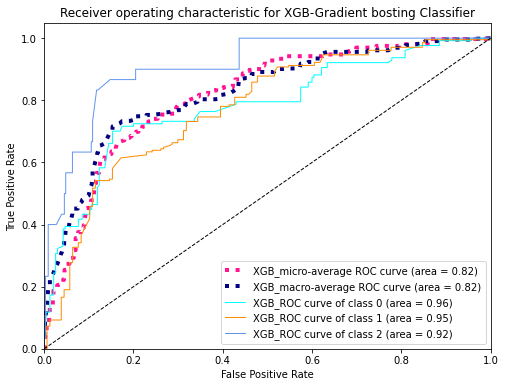

In [68]:
import matplotlib.pyplot as plt
from itertools import cycle

classes=np.unique(test[target])
n_classes = classes.shape[0]    
lw=1
# roc curve for classes
fpr_XGB = {} #Fpr = Fp/Fp+Tn
tpr_XGB = {} # recall (Tp/Tp+Fn)
thresh_XGB ={}
roc_auc_XGB = dict()

from sklearn.preprocessing import label_binarize
y_test_binarized_XGB=label_binarize(test[target],classes=np.unique(test[target]))
for i in range(n_class):    
    fpr_XGB[i], tpr_XGB[i], thresh_XGB[i] = roc_curve(y_test_binarized_XGB[:,i], pred_prob_XGB[:,i])
    roc_auc_XGB[i] = auc(fpr_XGB[i], tpr_XGB[i])

# First aggregate all false positive rates
all_fpr_XGB = np.unique(np.concatenate([fpr_XGB[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_XGB = np.zeros_like(all_fpr_XGB)
for i in range(n_classes):
    mean_tpr_XGB += np.interp(all_fpr_XGB, fpr_XGB[i], tpr_XGB[i])

# Finally average it and compute AUC
mean_tpr_XGB /= n_classes

fpr_XGB["macro_XGB"] = all_fpr_XGB
tpr_XGB["macro_XGB"] = mean_tpr_XGB
roc_auc_XGB["macro_XGB"] = auc(fpr_XGB["macro_XGB"], tpr_XGB["macro_XGB"])

# Compute micro-average ROC curve and ROC area

# micro-average ROC curve and ROC area
fpr_XGB["micro_XGB"], tpr_XGB["micro_XGB"], _ = roc_curve(y_test_binarized_XGB.ravel(), pred_prob_XGB.ravel())
roc_auc_XGB["micro_XGB"] = auc(fpr_XGB["micro_XGB"], tpr_XGB["micro_XGB"])


# Plot all ROC curves

plt.figure(figsize=(8,6))
plt.plot(
    fpr_XGB["micro_XGB"],
    tpr_XGB["micro_XGB"],
    label="XGB_micro-average ROC curve (area = {0:0.2f})".format(roc_auc_XGB["micro_XGB"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_XGB["macro_XGB"],
    tpr_XGB["macro_XGB"],
    label="XGB_macro-average ROC curve (area = {0:0.2f})".format(roc_auc_XGB["macro_XGB"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr_XGB[i],
        tpr_XGB[i],
        color=color,
        lw=lw,
        label="XGB_ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )


plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for XGB-Gradient bosting Classifier")
plt.legend(loc="lower right")
plt.show()


### data prepration for Clustering

In [39]:
pip install plotly
pip install cufflinks


In [60]:
#df_clus = df.copy()
#df_clus.info()

In [69]:
df_clus = df.copy()
for col in df_clus.columns:
    df_clus[col] = pd.Categorical(df_clus[col]).codes
df_clus 

#df["Gender"] = pd.Categorical(df["Gender"]).codes

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Adaptivity_Levels
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,2,0,1,0,1,1,0,1,2,1,0,1,1,1
1201,1,2,0,1,0,0,0,0,1,2,2,0,1,2,2
1202,0,1,1,1,0,1,1,0,0,1,1,0,1,2,2
1203,1,2,0,1,0,0,1,0,1,2,1,0,1,1,1


In [70]:
#df_clus.info()
#for col in df_clus.columns:
    print("Unique values of", col, "are :")
    print(df_clus[col].value_counts())
    print("-" * 50)

IndentationError: unexpected indent (<ipython-input-70-063df0395d31>, line 3)

## K-Means

First, let's just do a [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering with 3 clusters, as we know there are 3 different adapivity levels to internet.

Clustered Data
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0   0.40083           0.304144  0.304144   0.344831  0.317446
**************************************************


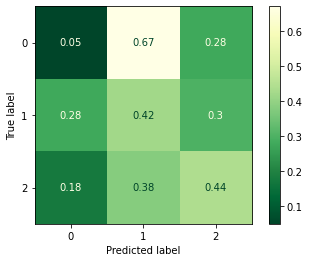

In [71]:

#Training Model
model_kmeans_1 = KMeans(n_clusters = 3, random_state = 10).fit(df_clus.drop(["Adaptivity Level"], axis = 1))
#model_kmeans_1.labels_

# saving the predictions

df_clus["cluster-kmeans-3"] = pd.Categorical(model_kmeans_1.labels_)
df_clus
#pred_pro_KNN = model_kmeans_1.predict_proba(df_clus["cluster-kmeans-3"])
# Metrics
print("Clustered Data")
print(model_metrics(df_clus["Adaptivity Level"], df_clus["cluster-kmeans-3"]))
print(50 * "*")


# Confusion matrix:
# Data
ConfusionMatrixDisplay.from_predictions(df_clus["Adaptivity Level"], df_clus["cluster-kmeans-3"], cmap = "YlGn_r", normalize ='true');
plt.grid(False)



## K-Nearest Neighbour

First, let's just do a [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering with 3 clusters, as we know there are 3 different adapivity levels to internet.

**********************************************************************
Training metrics:
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0   0.90866           0.842196  0.842196   0.921333  0.873521
**********************************************************************
Test metrics:
   Accuracy  Balanced Accuracy    Recall  Precision        F1
0  0.831492           0.788483  0.788483   0.764412  0.774386
**********************************************************************


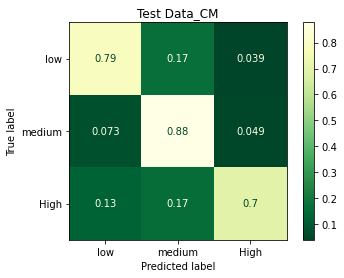

In [72]:
from sklearn.neighbors import KNeighborsClassifier
#Training Model
model_KNN = KNeighborsClassifier(n_neighbors=3).fit(train[features], train[target])
#model_kmeans_1.labels_

# saving the predictions
# Computing predictions
KNN_pred_train = model_KNN.predict(train[features])
KNN_pred_test = model_KNN.predict(test[features])
pred_prob_KNN = model_KNN.predict_proba(test[features])
# Metrics
# Metrics
print(70 * "*")
print("Training metrics:")
print(model_metrics(train[target], KNN_pred_train))
print(70 * "*")
print("Test metrics:")
print(model_metrics(test[target], KNN_pred_test))
print(70 * "*")
# Confusion matrix:
# Data
ConfusionMatrixDisplay.from_predictions(test[target], KNN_pred_test, cmap = "YlGn_r", display_labels = adaptivity_levels, normalize ='true');
plt.grid(False)
plt.title("Test Data_CM");


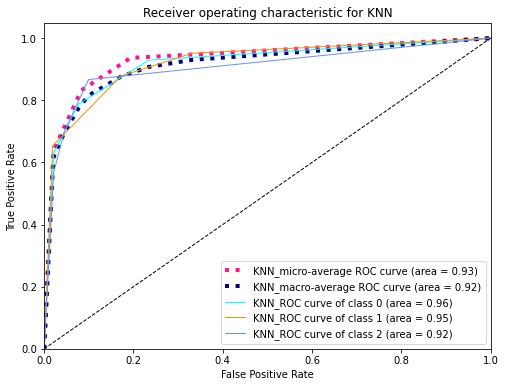

In [73]:
import matplotlib.pyplot as plt
from itertools import cycle

classes=np.unique(test[target])
n_classes = classes.shape[0]    
lw=1
# roc curve for classes
fpr_KNN = {} #Fpr = Fp/Fp+Tn
tpr_KNN = {} # recall (Tp/Tp+Fn)
thresh_KNN ={}
roc_auc_KNN = dict()

from sklearn.preprocessing import label_binarize
y_test_binarized_KNN=label_binarize(test[target],classes=np.unique(test[target]))
for i in range(n_class):    
    fpr_KNN[i], tpr_KNN[i], thresh_KNN[i] = roc_curve(y_test_binarized_rf[:,i], pred_prob_KNN[:,i])
    roc_auc_KNN[i] = auc(fpr_KNN[i], tpr_KNN[i])

# First aggregate all false positive rates
all_fpr_KNN = np.unique(np.concatenate([fpr_KNN[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_KNN = np.zeros_like(all_fpr_KNN)
for i in range(n_classes):
    mean_tpr_KNN += np.interp(all_fpr_KNN, fpr_KNN[i], tpr_KNN[i])

# Finally average it and compute AUC
mean_tpr_KNN /= n_classes

fpr_KNN["macro_KNN"] = all_fpr_KNN
tpr_KNN["macro_KNN"] = mean_tpr_KNN
roc_auc_KNN["macro_KNN"] = auc(fpr_KNN["macro_KNN"], tpr_KNN["macro_KNN"])

# Compute micro-average ROC curve and ROC area

# micro-average ROC curve and ROC area
fpr_KNN["micro_KNN"], tpr_KNN["micro_KNN"], _ = roc_curve(y_test_binarized_KNN.ravel(), pred_prob_KNN.ravel())
roc_auc_KNN["micro_KNN"] = auc(fpr_KNN["micro_KNN"], tpr_KNN["micro_KNN"])


# Plot all ROC curves

plt.figure(figsize=(8,6))
plt.plot(
    fpr_KNN["micro_KNN"],
    tpr_KNN["micro_KNN"],
    label="KNN_micro-average ROC curve (area = {0:0.2f})".format(roc_auc_KNN["micro_KNN"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_KNN["macro_KNN"],
    tpr_KNN["macro_KNN"],
    label="KNN_macro-average ROC curve (area = {0:0.2f})".format(roc_auc_KNN["macro_KNN"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr_KNN[i],
        tpr_KNN[i],
        color=color,
        lw=lw,
        label="KNN_ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )


plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for KNN")
plt.legend(loc="lower right")
plt.show()


# Results:

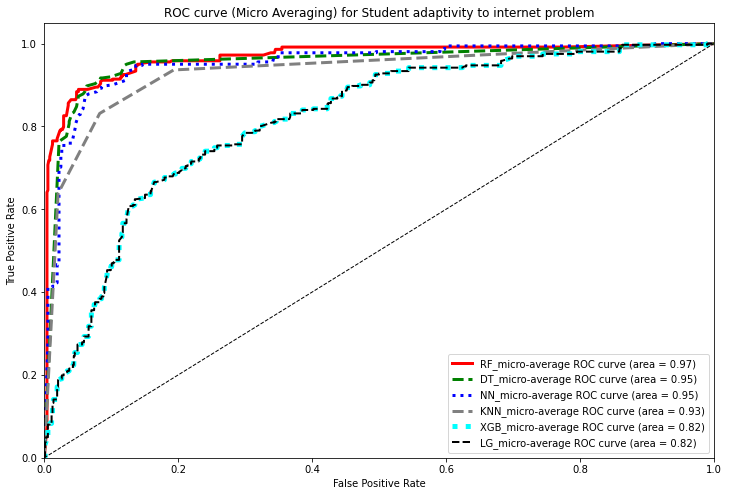

In [335]:
import matplotlib.pyplot as plt
from itertools import cycle

classes=np.unique(test[target])
n_classes = classes.shape[0]    
lw=1
######################### XGB Classifier #################
# roc curve for classes
fpr_XGB = {} #Fpr = Fp/Fp+Tn
tpr_XGB = {} # recall (Tp/Tp+Fn)
thresh_XGB ={}
roc_auc_XGB = dict()

from sklearn.preprocessing import label_binarize
y_test_binarized_XGB=label_binarize(test[target],classes=np.unique(test[target]))
for i in range(n_class):    
    fpr_XGB[i], tpr_XGB[i], thresh_XGB[i] = roc_curve(y_test_binarized_XGB[:,i], pred_prob_XGB[:,i])
    roc_auc_XGB[i] = auc(fpr_XGB[i], tpr_XGB[i])

# First aggregate all false positive rates
all_fpr_XGB = np.unique(np.concatenate([fpr_XGB[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_XGB = np.zeros_like(all_fpr_XGB)
for i in range(n_classes):
    mean_tpr_XGB += np.interp(all_fpr_XGB, fpr_XGB[i], tpr_XGB[i])

# Finally average it and compute AUC
mean_tpr_XGB /= n_classes

fpr_XGB["macro_XGB"] = all_fpr_XGB
tpr_XGB["macro_XGB"] = mean_tpr_XGB
roc_auc_XGB["macro_XGB"] = auc(fpr_XGB["macro_XGB"], tpr_XGB["macro_XGB"])

# Compute micro-average ROC curve and ROC area

# micro-average ROC curve and ROC area
fpr_XGB["micro_XGB"], tpr_XGB["micro_XGB"], _ = roc_curve(y_test_binarized_XGB.ravel(), pred_prob_XGB.ravel())
roc_auc_XGB["micro_XGB"] = auc(fpr_XGB["micro_XGB"], tpr_XGB["micro_XGB"])
######################### KNN Classifier #################
# roc curve for classes
fpr_KNN = {} #Fpr = Fp/Fp+Tn
tpr_KNN = {} # recall (Tp/Tp+Fn)
thresh_KNN ={}
roc_auc_KNN = dict()

from sklearn.preprocessing import label_binarize
y_test_binarized_KNN=label_binarize(test[target],classes=np.unique(test[target]))
for i in range(n_class):    
    fpr_KNN[i], tpr_KNN[i], thresh_KNN[i] = roc_curve(y_test_binarized_rf[:,i], pred_prob_KNN[:,i])
    roc_auc_KNN[i] = auc(fpr_KNN[i], tpr_KNN[i])

# First aggregate all false positive rates
all_fpr_KNN = np.unique(np.concatenate([fpr_KNN[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_KNN = np.zeros_like(all_fpr_KNN)
for i in range(n_classes):
    mean_tpr_KNN += np.interp(all_fpr_KNN, fpr_KNN[i], tpr_KNN[i])

# Finally average it and compute AUC
mean_tpr_KNN /= n_classes

fpr_KNN["macro_KNN"] = all_fpr_KNN
tpr_KNN["macro_KNN"] = mean_tpr_KNN
roc_auc_KNN["macro_KNN"] = auc(fpr_KNN["macro_KNN"], tpr_KNN["macro_KNN"])

# Compute micro-average ROC curve and ROC area

# micro-average ROC curve and ROC area
fpr_KNN["micro_KNN"], tpr_KNN["micro_KNN"], _ = roc_curve(y_test_binarized_KNN.ravel(), pred_prob_KNN.ravel())
roc_auc_KNN["micro_KNN"] = auc(fpr_KNN["micro_KNN"], tpr_KNN["micro_KNN"])
######################### DECISION TREE Classifier #################
# roc curve for classes
fpr_dt = {} #Fpr = Fp/Fp+Tn
tpr_dt = {} # recall (Tp/Tp+Fn)
thresh_dt ={}
roc_auc_dt = dict()

n_class = classes.shape[0]
from sklearn.preprocessing import label_binarize
y_test_binarized_dt=label_binarize(test[target],classes=np.unique(test[target]))
for i in range(n_class):    
    fpr_dt[i], tpr_dt[i], thresh_dt[i] = roc_curve(y_test_binarized_dt[:,i], pred_pro_dt[:,i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# First aggregate all false positive rates
all_fpr_dt = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_dt = np.zeros_like(all_fpr_dt)
for i in range(n_classes):
    mean_tpr_dt += np.interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])

# Finally average it and compute AUC
mean_tpr_dt /= n_classes

fpr_dt["macro_dt"] = all_fpr_dt
tpr_dt["macro_dt"] = mean_tpr_dt
roc_auc_dt["macro_dt"] = auc(fpr_dt["macro_dt"], tpr_dt["macro_dt"])

# Compute micro-average ROC curve and ROC area

# micro-average ROC curve and ROC area
fpr_dt["micro_dt"], tpr_dt["micro_dt"], _ = roc_curve(y_test_binarized_dt.ravel(), pred_pro_dt.ravel())
roc_auc_dt["micro_dt"] = auc(fpr_dt["micro_dt"], tpr_dt["micro_dt"])

######################### Logist regression#################
# roc curve for classes
fpr = {} #Fpr = Fp/Fp+Tn
tpr = {} # recall (Tp/Tp+Fn)
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]
from sklearn.preprocessing import label_binarize
y_test_binarized=label_binarize(test[target],classes=np.unique(test[target]))
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob_lg[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro_lg"] = all_fpr
tpr["macro_lg"] = mean_tpr
roc_auc["macro_lg"] = auc(fpr["macro_lg"], tpr["macro_lg"])

# Compute micro-average ROC curve and ROC area

# micro-average ROC curve and ROC area
fpr["micro_lg"], tpr["micro_lg"], _ = roc_curve(y_test_binarized.ravel(), pred_prob_lg.ravel())
roc_auc["micro_lg"] = auc(fpr["micro_lg"], tpr["micro_lg"])
######################### Neural Networks (MLP) ############################
classes=np.unique(test[target])
n_classes = classes.shape[0]    
lw=1
# roc curve for classes
fpr_NN_mlp = {} #Fpr = Fp/Fp+Tn
tpr_NN_mlp = {} # recall (Tp/Tp+Fn)
thresh_NN_mlp ={}
roc_auc_NN_mlp = dict()

from sklearn.preprocessing import label_binarize
y_test_binarized_NN_mlp=label_binarize(test[target],classes=np.unique(test[target]))
for i in range(n_class):    
    fpr_NN_mlp[i], tpr_NN_mlp[i], thresh_NN_mlp[i] = roc_curve(y_test_binarized_NN_mlp[:,i], pred_pro_NN_mlp[:,i])
    roc_auc_NN_mlp[i] = auc(fpr_NN_mlp[i], tpr_NN_mlp[i])

# First aggregate all false positive rates
all_fpr_NN_mlp= np.unique(np.concatenate([fpr_NN_mlp[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_NN_mlp = np.zeros_like(all_fpr_NN_mlp)
for i in range(n_classes):
    mean_tpr_NN_mlp += np.interp(all_fpr_NN_mlp, fpr_NN_mlp[i], tpr_NN_mlp[i])

# Finally average it and compute AUC
mean_tpr_NN_mlp /= n_classes

fpr_NN_mlp["macro_NN_mlp"] = all_fpr_NN_mlp
tpr_NN_mlp["macro_NN_mlp"] = mean_tpr_NN_mlp
roc_auc_NN_mlp["macro_NN_mlp"] = auc(fpr_NN_mlp["macro_NN_mlp"], tpr_NN_mlp["macro_NN_mlp"])

# Compute micro-average ROC curve and ROC area

# micro-average ROC curve and ROC area
fpr_NN_mlp["micro_NN_mlp"], tpr_NN_mlp["micro_NN_mlp"], _ = roc_curve(y_test_binarized_NN_mlp.ravel(), pred_pro_NN_mlp.ravel())
roc_auc_NN_mlp["micro_NN_mlp"] = auc(fpr_NN_mlp["micro_NN_mlp"], tpr_NN_mlp["micro_NN_mlp"])

######################### Random Forest ############################
# roc curve for classes
fpr_rf = {} #Fpr = Fp/Fp+Tn
tpr_rf = {} # recall (Tp/Tp+Fn)
thresh_rf ={}
roc_auc_rf = dict()

from sklearn.preprocessing import label_binarize
y_test_binarized_rf=label_binarize(test[target],classes=np.unique(test[target]))
for i in range(n_class):    
    fpr_rf[i], tpr_rf[i], thresh_rf[i] = roc_curve(y_test_binarized_rf[:,i], pred_pro_rf[:,i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# First aggregate all false positive rates
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(n_classes):
    mean_tpr_rf += np.interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])

# Finally average it and compute AUC
mean_tpr_rf /= n_classes

fpr_rf["macro_rf"] = all_fpr_rf
tpr_rf["macro_rf"] = mean_tpr_rf
roc_auc_rf["macro_rf"] = auc(fpr_rf["macro_rf"], tpr_rf["macro_rf"])

# Compute micro-average ROC curve and ROC area

# micro-average ROC curve and ROC area
fpr_rf["micro_rf"], tpr_rf["micro_rf"], _ = roc_curve(y_test_binarized_rf.ravel(), pred_pro_rf.ravel())
roc_auc_rf["micro_rf"] = auc(fpr_rf["micro_rf"], tpr_rf["micro_rf"])

plt.figure(figsize=(12,8))
######################### Plot all ROC curves for Random Forest regression ######################

plt.plot(
    fpr_rf["micro_rf"],
    tpr_rf["micro_rf"],
    label="RF_micro-average ROC curve (area = {0:0.2f})".format(roc_auc_rf["micro_rf"]),
    color="red",
    linestyle="-",
    linewidth=3,
)


######################### Plot all ROC curves for Decesion Tree regression ######################
plt.plot(
    fpr_dt["micro_dt"],
    tpr_dt["micro_dt"],
    label="DT_micro-average ROC curve (area = {0:0.2f})".format(roc_auc_dt["micro_dt"]),
    color="green",
    linestyle="--",
    linewidth=3,
)

######################### Plot all ROC curves for Neural Networks (MLP) regression ######################
plt.plot(
    fpr_NN_mlp["micro_NN_mlp"],
    tpr_NN_mlp["micro_NN_mlp"],
    label="NN_micro-average ROC curve (area = {0:0.2f})".format(roc_auc_NN_mlp["micro_NN_mlp"]),
    color="blue",
    linestyle=":",
    linewidth=3,
)
######################### Plot all ROC curves for KNN_Clasiifier ######################
plt.plot(
    fpr_KNN["micro_KNN"],
    tpr_KNN["micro_KNN"],
    label="KNN_micro-average ROC curve (area = {0:0.2f})".format(roc_auc_KNN["micro_KNN"]),
    color="gray",
    linestyle="--",
    linewidth=3,
)

######################### Plot all ROC curves for XGBoost classifier######################
plt.plot(
    fpr_XGB["micro_XGB"],
    tpr_XGB["micro_XGB"],
    label="XGB_micro-average ROC curve (area = {0:0.2f})".format(roc_auc_XGB["micro_XGB"]),
    color="cyan",
    linestyle=":",
    linewidth=5,
)
######################### Plot all ROC curves for Logistic regression ######################
plt.plot(
    fpr["micro_lg"],
    tpr["micro_lg"],
    label="LG_micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro_lg"]),
    color="black",
    linestyle="--",
    linewidth=2,
)
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve (Micro Averaging) for Student adaptivity to internet problem")
plt.legend(loc="lower right")
plt.show()

In [54]:
print(metrics.classification_report(test[target], dt_pred_test, digits=3))
print(metrics.classification_report(test[target], pred_test_rf, digits=3))
print(metrics.classification_report(test[target], pred_test_NN_mlp, digits=3))
print(metrics.classification_report(test[target], pred_test_lg, digits=3))
print(metrics.classification_report(test[target], KNN_pred_test , digits=3))

              precision    recall  f1-score   support

           1      0.847     0.913     0.879       127
           2      0.937     0.873     0.904       205
           3      0.706     0.800     0.750        30

    accuracy                          0.881       362
   macro avg      0.830     0.862     0.844       362
weighted avg      0.886     0.881     0.882       362

              precision    recall  f1-score   support

           1      0.885     0.906     0.895       127
           2      0.925     0.902     0.914       205
           3      0.750     0.800     0.774        30

    accuracy                          0.895       362
   macro avg      0.853     0.869     0.861       362
weighted avg      0.896     0.895     0.895       362

              precision    recall  f1-score   support

           1      0.897     0.890     0.893       127
           2      0.933     0.878     0.905       205
           3      0.558     0.800     0.658        30

    accuracy        